I will be evaluating the sport of powerlifting and its development over the years. This will be accomplished through the OpenPowerlifting database. Areas covered include:
* Percentage of growth of powerlifting participants up to the middle of 2019.
* Identifying the top 10 popular weight classes up to the middle of 2019.
* The world record progression of the 132lb(60kg) weight class.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

Growth of powerlifting:

In [2]:
# Reading and cleaning data
df = pd.read_csv("./openpowerlifting.csv",
                 low_memory=False,
                 usecols=["Date","WeightClassKg"])

df["Date"] = pd.to_datetime(df["Date"]).dt.strftime(("%Y"))
df.rename(columns={"Date":"Year"})


,WeightClassKg,Year
0,60,2018
1,60,2018
2,56,2018
3,60,2018
4,110,2018
...,...,...
1423349,74,2017
1423350,66,2017
1423351,105,2017
1423352,83,2017


Text(0.5, 1.0, 'Growth of Powerlifting from 1964 to 2019')

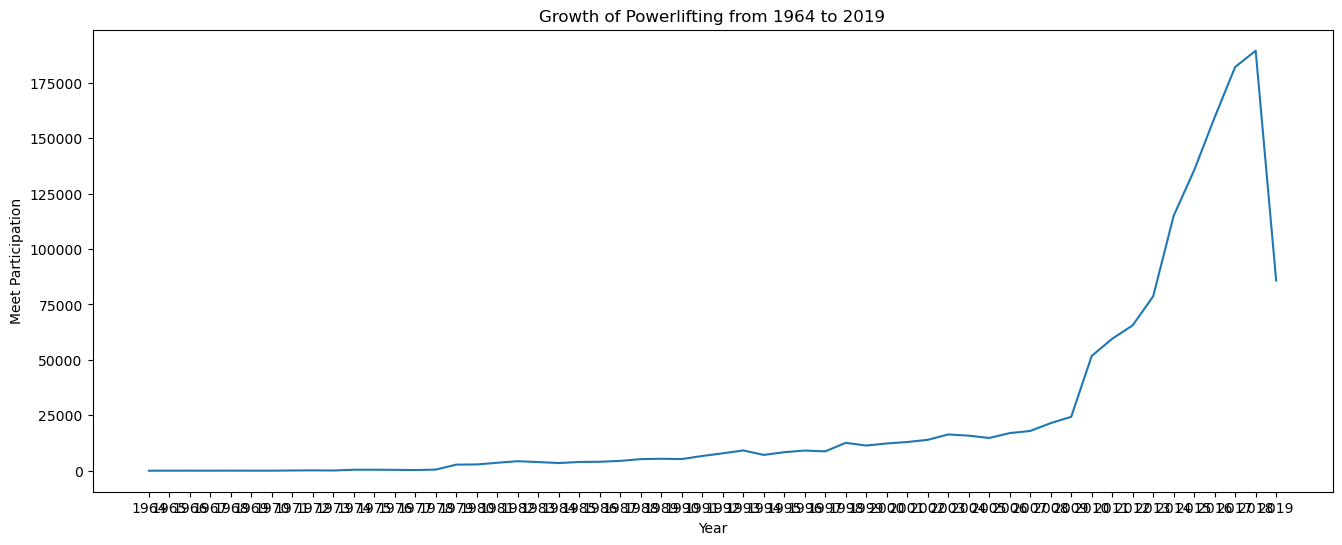

In [3]:
# Graphing the dataframe
growth_df = df['Date'].value_counts().rename_axis("Year").to_frame("Meet Participation").sort_values(by="Year")

fig, ax = plt.subplots(figsize=(16,6))
ax = sns.lineplot(data=growth_df, x="Year", y="Meet Participation")
ax.set_title("Growth of Powerlifting from 1964 to 2019")

Identifying the most popular weight classes:

In [23]:
# Cleaning data to the ten most popular weight classes
pop_df = df['WeightClassKg'].value_counts().rename_axis("Most Popular Weight Classes in Kg").to_frame("Meet Participation").head(10)

<AxesSubplot:xlabel='Most Popular Weight Classes', ylabel='Meet Participation'>

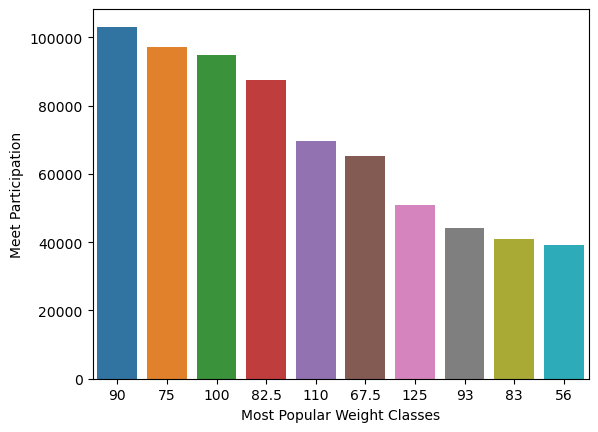

In [24]:
sns.barplot(data=pop_df, x=pop_df.index,y="Meet Participation")

The world record progression of the 132lb(60kg) weight class:

In [20]:
frames = []
year = 1964
# Loop to access the records of every year
while (year != 2023):
    placeholder = str(year)
    # Finding and appending the dataframe to the dataframe I will use
    dfs = pd.read_html("https://www.openpowerlifting.org/records/raw/fully-tested/" + placeholder,
                      index_col="Class")[6]
    frames.append(pd.DataFrame(dfs[['Lifter', 'Total']].loc['60']).swapaxes("index", "columns"))
    wr_df = pd.concat(frames)
    year += 1

# Cleaning the data
year_column = np.arange(1964, 2023)
wr_df["Year"] = year_column
wr_df = wr_df.dropna().reset_index(drop=True)
wr_df = wr_df[~wr_df.index.duplicated()] # Fixing ValueError


In [21]:
# Ensuring there's no dips in the world record progression graph
total = 0
i = 0

while(i < len(wr_df)):
    if wr_df["Total"].iloc[i] > total:
        total = wr_df["Total"].iloc[i]
    else:
        wr_df["Total"].iloc[i] = total
    i += 1


C:\Users\danny\AppData\Local\Temp\ipykernel_21684\3650397605.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wr_df["Total"].iloc[i] = total


<AxesSubplot:xlabel='Year', ylabel='Total in Kgs'>

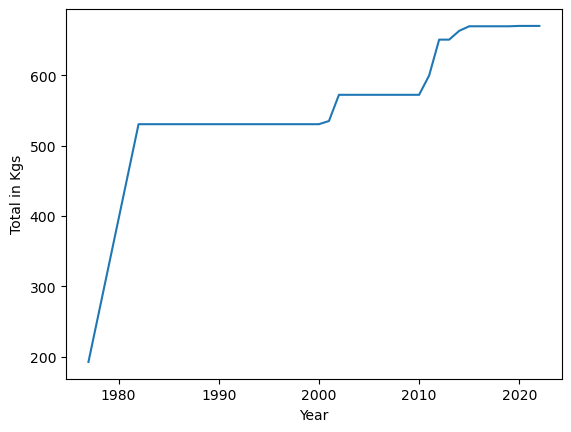

In [22]:
plt.ylabel("Total in Kgs")
sns.lineplot(data=wr_df, x="Year", y="Total")